# Adidas EDA

### ***Libraries for data analysis and wrangling***

In [2]:
import pandas as pd
import numpy as np
import random as rnd


### ***Libraries for visualization***


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ***Libraries for machine learning***


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### ***Importing Data***

In [61]:
adidasData=pd.read_excel('Adidas US Sales Datasets.xlsx')

### ***Checking Some Data***

In [62]:
adidasData.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


### ***Some Columns And Rows Must Be Cleaning***

In [63]:
adidasData = adidasData.drop('Unnamed: 0',axis=1)
adidasData = adidasData.drop(labels=[0,1,2], axis=0)
adidasData.columns = adidasData.iloc[0]
adidasData = adidasData.drop(labels=3, axis=0)
adidasData = adidasData.reset_index(drop=True)

In [64]:
newdata=adidasData.to_excel("adidas_clean.xlsx")

### ***Exploring Data*** 

In [8]:
adidasData.isna().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

***Data Are Clear***

In [9]:
adidasData.duplicated().sum()

0

***No Duplicated Found***

### ***Checking For Some Information***

In [10]:
adidasData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


### ***Adding Some Columns And Rows ,Year,Month,Dayes,Quarter May Be Good For Analyzing***

In [11]:
adidasData['Invoice Date']=pd.to_datetime(adidasData['Invoice Date'])
adidasData['Year']=pd.to_datetime(adidasData['Invoice Date']).dt.year
adidasData['Month']=pd.to_datetime(adidasData['Invoice Date']).dt.month_name()
adidasData["Dayes"]=pd.to_datetime(adidasData['Invoice Date']).dt.day_name()
adidasData["Quarter"]=pd.to_datetime(adidasData['Invoice Date']).dt.quarter



### ***Changing Data Type For Some Features***

In [12]:
adidasData[['Price per Unit','Units Sold','Total Sales','Operating Margin','Operating Profit']]=adidasData[['Price per Unit','Units Sold','Total Sales','Operating Margin','Operating Profit']].astype("float")

print(adidasData.info())
adidasData.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int32         
 14  Month             9648 n

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Dayes,Quarter
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.5,In-store,2020,January,Wednesday,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.3,In-store,2020,January,Thursday,1


### ***Describing Data***

In [13]:
adidasData.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
3,,,,,,,,
Invoice Date,9648,2021-05-10 15:20:44.776119296,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
Price per Unit,9648.0,45.22,7.0,35.0,45.0,55.0,110.0,14.71
Units Sold,9648.0,256.93,0.0,106.0,176.0,350.0,1275.0,214.25
Total Sales,9648.0,93273.44,0.0,4254.5,9576.0,150000.0,825000.0,141916.02
Operating Profit,9648.0,34425.24,0.0,1921.75,4371.42,52062.5,390000.0,54193.11
Operating Margin,9648.0,0.42,0.1,0.35,0.41,0.49,0.8,0.1
Year,9648.0,2020.87,2020.0,2021.0,2021.0,2021.0,2021.0,0.34
Quarter,9648.0,2.49,1.0,1.0,2.0,3.0,4.0,1.12


In [14]:
adidasData.describe(include=("O")).round(2).T

,count,unique,top,freq
3,,,,
Retailer,9648,6,Foot Locker,2637
Retailer ID,9648,4,1185732,5265
Region,9648,5,West,2448
State,9648,50,California,432
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Sales Method,9648,3,Online,4889
Month,9648,12,January,861
Dayes,9648,7,Tuesday,1490


### ***Cheching For Some Details***

In [15]:
adidasData.head(2)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Dayes,Quarter
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.5,In-store,2020,January,Wednesday,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.3,In-store,2020,January,Thursday,1


### ***Some information about features***

In [16]:
#checking for counts for some features
print("Count of all region are      ", adidasData["Region"].count()
)
print("Count of all Retailer ID are ", adidasData["Retailer ID"].count()
)
print("Count of all State are       ", adidasData["State"].count()
)
print("Count of all Retailer are    ", adidasData["Retailer"].count()
)
print("Count of all City are        ", adidasData["City"].count()
)
print("Count of all Product are     ", adidasData["Product"].count()
)

Count of all region are       9648
Count of all Retailer ID are  9648
Count of all State are        9648
Count of all Retailer are     9648
Count of all City are         9648
Count of all Product are      9648


In [17]:
#checking for counts per feature
print(
    "Counts per region are      ")
print(adidasData["Region"].value_counts())
print("=="*15
)
print(
    "Counts per Retailer ID are ")
print(adidasData["Retailer ID"].value_counts())
print("=="*15
)
print(
    "Counts per State are       ")
print(adidasData["State"].value_counts())
print("=="*15
)
print(
    "Counts per Retailer are    ")
print(adidasData["Retailer"].value_counts())
print("=="*15
)
print("Counts per City are  ")
print(adidasData["City"].value_counts())
print("=="*15
)
print(
    "Counts per Product are     ")
print(adidasData["Product"].value_counts())

Counts per region are      
Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64
Counts per Retailer ID are 
Retailer ID
1185732    5265
1128299    2370
1197831    1653
1189833     360
Name: count, dtype: int64
Counts per State are       
State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Ind

In [18]:
#checking for counts for some features
print("number of Unique region are      ", adidasData["Region"].nunique()
)
print("number of Unique Retailer ID are ", adidasData["Retailer ID"].nunique()
)
print("number of Unique State are       ", adidasData["State"].nunique()
)
print("number of Unique Retailer are    ", adidasData["Retailer"].nunique()
)
print("number of Unique City are        ", adidasData["City"].nunique()
)
print("number of Unique Product are     ", adidasData["Product"].nunique()
)

number of Unique region are       5
number of Unique Retailer ID are  4
number of Unique State are        50
number of Unique Retailer are     6
number of Unique City are         52
number of Unique Product are      6


### ***Relationships between some features with each other***

In [19]:
adidasData.groupby('Region')['Retailer ID'].count()

Region
Midwest      1872
Northeast    2376
South        1728
Southeast    1224
West         2448
Name: Retailer ID, dtype: int64

### ***We can show distribuation of Total Sales per region***

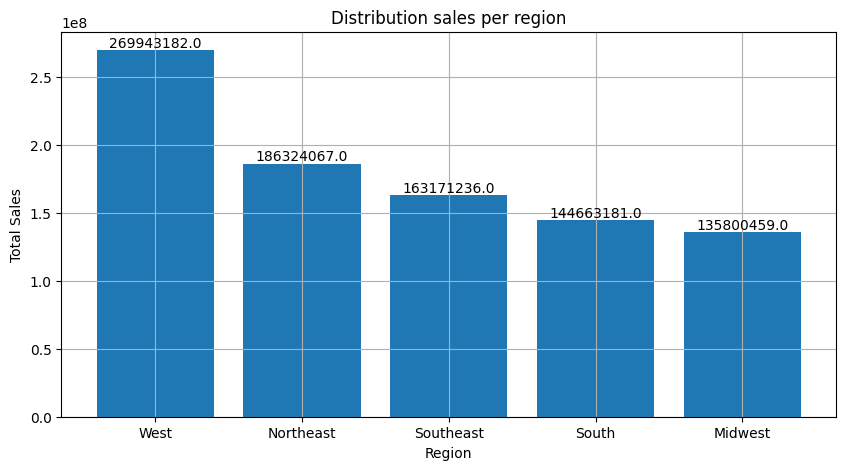

In [20]:
sales_region = adidasData.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
# Create a bar chart
plt.figure(figsize=(10,5 ))
plt.bar(sales_region.index, sales_region.values)
plt.grid()
plt.title("Distribution sales per region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
# Add labels to each bar
for i, value in enumerate(sales_region.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()


### ***We can show distribuation of retailer per region***

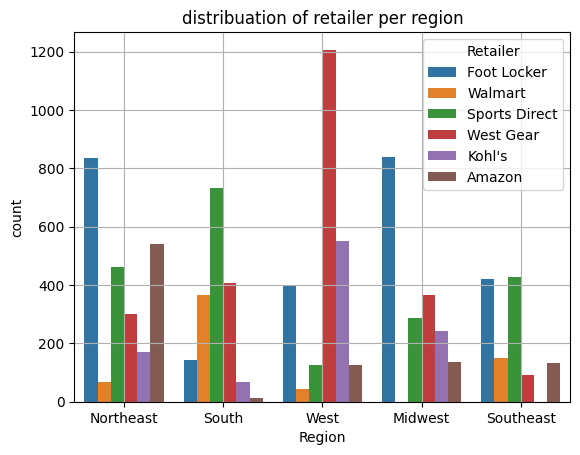

In [21]:
sns.countplot(adidasData,x="Region",hue="Retailer")
plt.grid()
plt.title("distribuation of retailer per region")
plt.show()

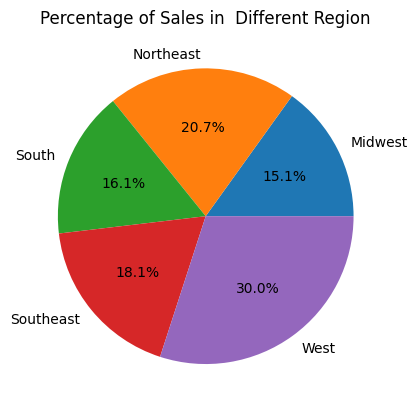

In [22]:
region_sales=adidasData.groupby('Region')['Total Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Percentage of Sales in  Different Region')
plt.show()

### ***Bigest sales per region at West (30%)***

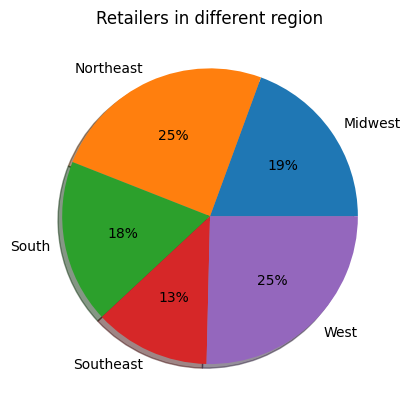

In [23]:
#We can show a visualize for retailers in different region by different ways :
retailerRegion=adidasData.groupby('Region')['Retailer ID'].count()
plt.pie(retailerRegion, labels=retailerRegion.index, autopct='%1.0f%%',shadow=True)
plt.title('Retailers in different region')
plt.show()

### ***Most retailers we have at West (25%)***


### ***I see that we must calculate the average per retailer to determine what is the true best region for sale***


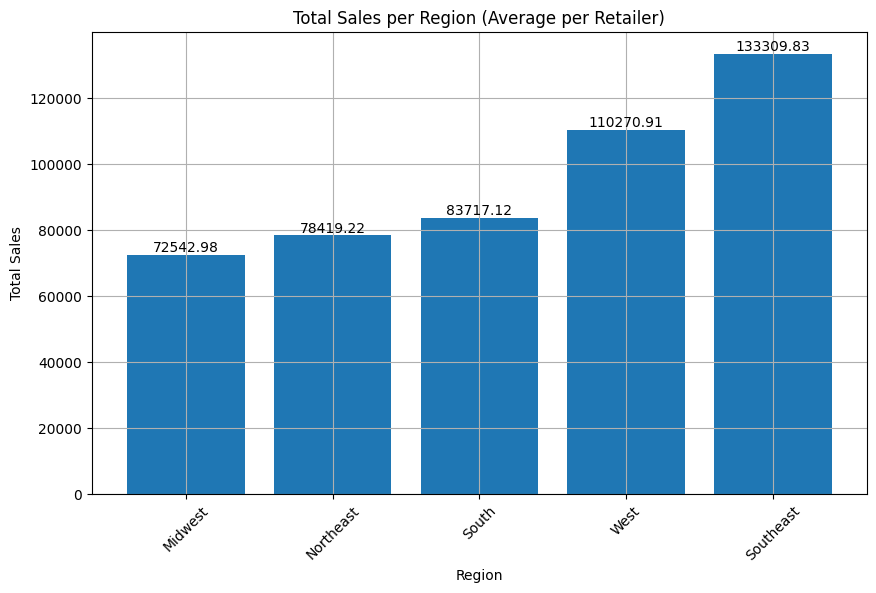

Region
Midwest       72542.980235
Northeast     78419.220118
South         83717.118634
West         110270.907680
Southeast    133309.833333
dtype: float64


In [24]:
adidas = adidasData.groupby('Region')['Total Sales'].sum().divide(adidasData.groupby('Region')['Retailer ID'].count()).sort_values()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(adidas.index, adidas.values)

# Add labels to each bar
for i, value in enumerate(adidas.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Add titles and labels
plt.title('Total Sales per Region (Average per Retailer)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid()
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()
print(adidas)

### ***Southeast Region have bigest sales per Retailer***


### ***Create Table for Sales per reigon accourding to month***

In [25]:
adidas_southeast = adidasData.pivot_table(values='Total Sales', index='Month', columns='Region', fill_value=0)

# Reorder Monthes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex With month order
adidas_southeast = adidas_southeast.reindex(month_order)
adidas_southeast

Region,Midwest,Northeast,South,Southeast,West
Month,,,,,
January,65435.805882,82471.821739,37905.069444,95263.422222,100614.257525
February,75139.103659,70219.900000,37106.763889,80045.244444,97266.662963
March,57892.470149,85671.467662,43821.452381,73935.555556,78310.159363
April,47156.194444,79426.286458,72213.925926,110783.262712,104314.839080
May,74536.795082,90549.906433,74287.541667,124139.303922,115909.455516
June,66628.599099,86522.480000,106137.250000,161431.733333,127213.912821
July,81586.211207,97807.503030,121600.282828,194032.233333,164431.521277
August,95362.256944,82916.446667,87888.754209,169197.923729,138390.652778
September,62118.787037,62971.644737,96403.153333,153289.434783,89730.571429


### ***Plotting previous Table***

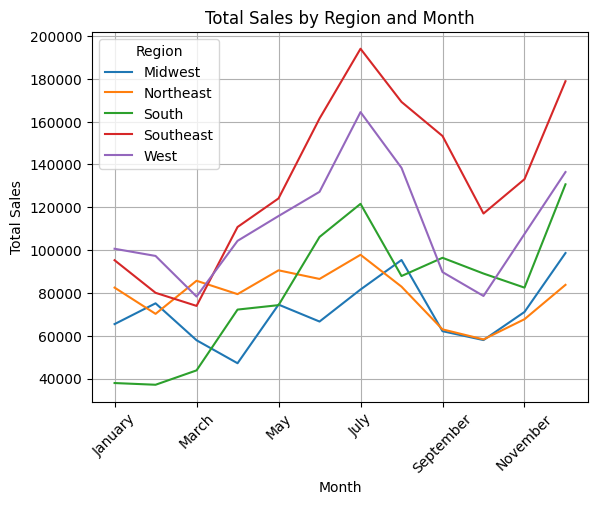

In [26]:


# Plotting the pivot table
adidas_southeast.plot.line()
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.grid()
plt.show()

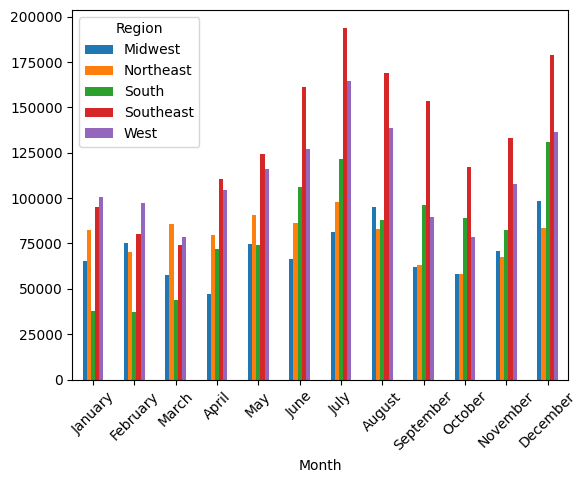

In [27]:
# Plotting the pivot table
adidas_southeast.plot.bar()
plt.xticks(rotation=45)
plt.show()

our remarkes are  increasing in ***Sales*** at ***Summer*** and close to ***Holidays***

Some Regions are good and other needs to evaluate

### ***what are the best region***

Month,June,July,August,November,December
State,,,,,
Florida,196300.06,236824.00,182551.24,135327.17,192831.67
Georgia,97227.44,103493.56,108407.56,96003.61,111169.72
Kentucky,63218.92,86873.25,84495.67,71659.17,96789.00
North Carolina,209394.67,256595.50,231065.67,191426.42,259771.33
South Carolina,245594.33,288322.42,260332.08,230726.08,293518.50
Virginia,168159.22,208649.50,150330.06,105034.28,156943.78


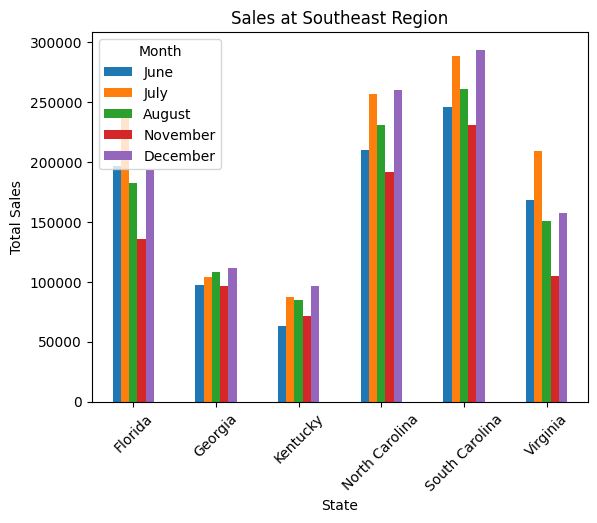

In [28]:
adidas_states = adidasData.pivot_table(values='Total Sales', index=['Region','State'], columns='Month', fill_value=0)
region = 'Southeast'

months = ['June', 'July', 'August', 'November', 'December']
Southeast_data = adidas_states.loc[region, months].round(2)
Southeast_data.plot.bar()
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales at Southeast Region')
plt.xticks(rotation=45)
Southeast_data

### ***What is the best retailer ? so we can invest more ,***

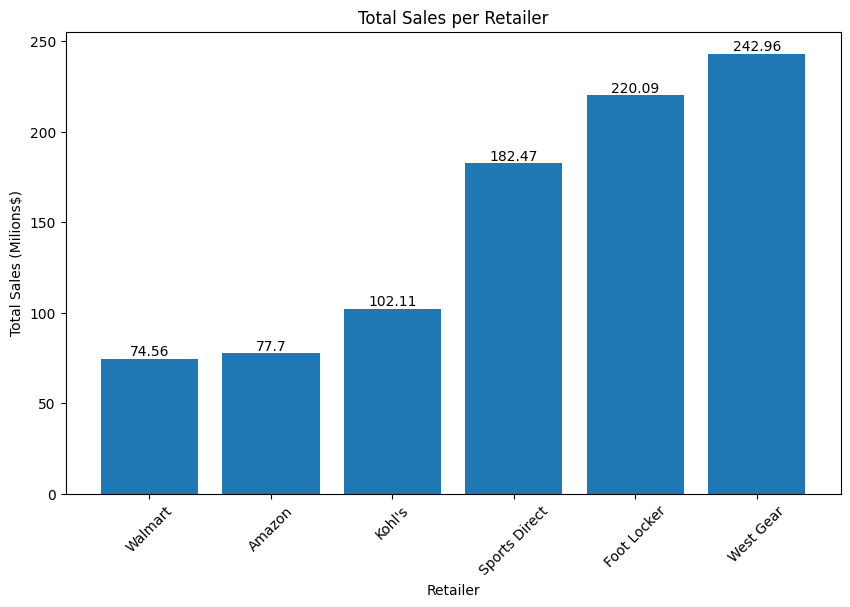

In [29]:
adidas_most=adidasData.groupby('Retailer')['Total Sales'].sum().sort_values()
adidas_most_milions=adidas_most/1000000

plt.figure(figsize=(10, 6))
plt.bar(adidas_most_milions.index, adidas_most_milions.values)

# Add labels to each bar
for i, value in enumerate(adidas_most_milions.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Add titles and labels
plt.title('Total Sales per Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales (Milions$)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

### ***We can compare sales per years to find differences between 2020 and 2021*** 

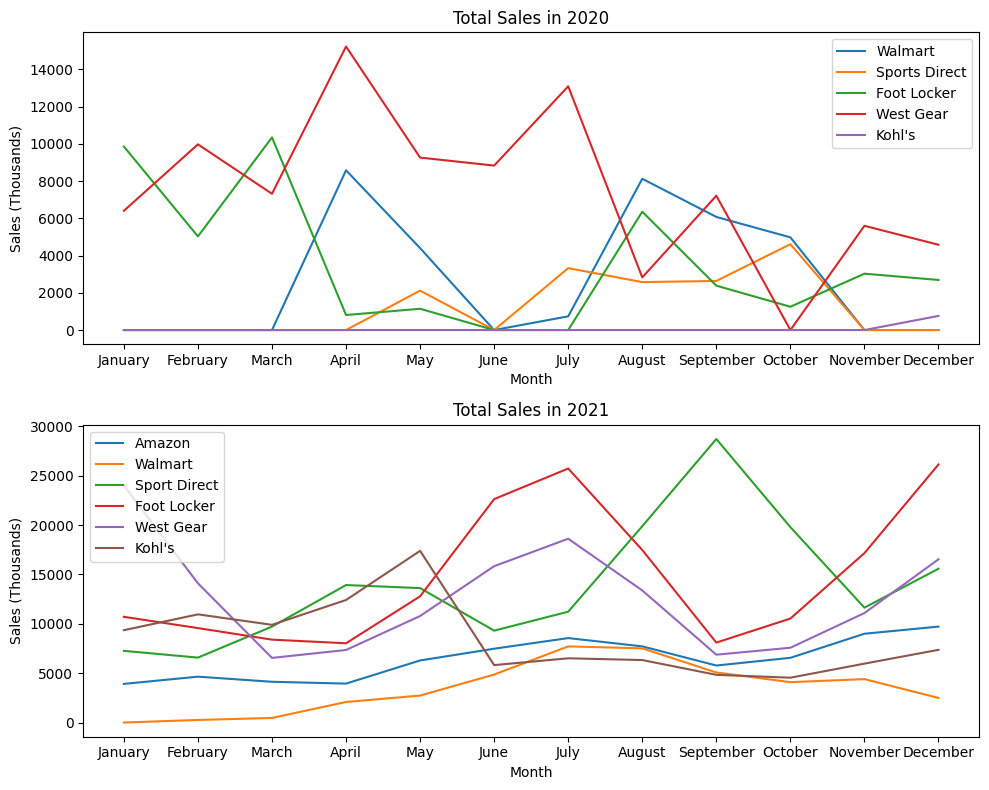

In [30]:
adidas_2020=adidasData[adidasData['Year']==2020]
adidas_2021=adidasData[adidasData['Year']==2021]

adidas_retailer_2020=pd.pivot_table(adidas_2020,values='Total Sales',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2020=(adidas_retailer_2020/1000).round(2)

adidas_retailer_2021=pd.pivot_table(adidas_2021,values='Total Sales',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2021=(adidas_retailer_2021/1000).round(2)

adidas_retailer_Thousands_2020=adidas_retailer_Thousands_2020.reindex(month_order)
adidas_retailer_Thousands_2021=adidas_retailer_Thousands_2021.reindex(month_order)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020[['Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Walmart','Sports Direct','Foot Locker','West Gear'])
axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[0].set_title('Total Sales in 2020')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales (Thousands)')
axes[0].legend()

axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021[['Amazon','Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Amazon','Walmart','Sport Direct','Foot Locker','West Gear'])
axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[1].set_title('Total Sales in 2021')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales (Thousands)')
axes[1].legend()

plt.tight_layout()
plt.show()

### ***<<2021=>>***

**1. most summer sales appeared at "Foot Locker"& "West Gear"**

**2. But in same time we can observe that "Sport Direct" which has an increase in sales at September but other retailers have decrease in sales** 

**3. We have also "West Gear" one more outlier that has good sales at January**

**In 2020 
 "West Gear" leader in sales at summer and April ( I thin it was in times of lockdown**)

### ***Product Analyzing***

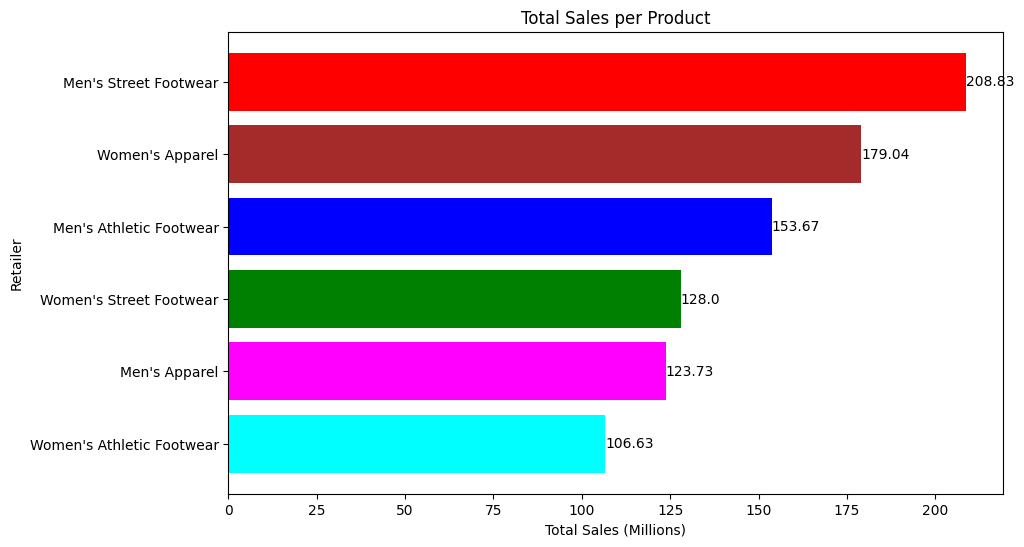

In [31]:
adidas_product_m=(adidasData.groupby("Product")['Total Sales'].sum()/1000000).round(2).sort_values()

colors = ['cyan', 'magenta', 'green', 'blue',"brown","red"]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(adidas_product_m.index, adidas_product_m.values, color=colors)

# Add labels to each bar
for i, value in enumerate(adidas_product_m.values):
    plt.text(value, i, str(round(value, 2)), ha='left', va='center')

# Add titles and labels
plt.title('Total Sales per Product')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Retailer')
# Display the chart
plt.show()



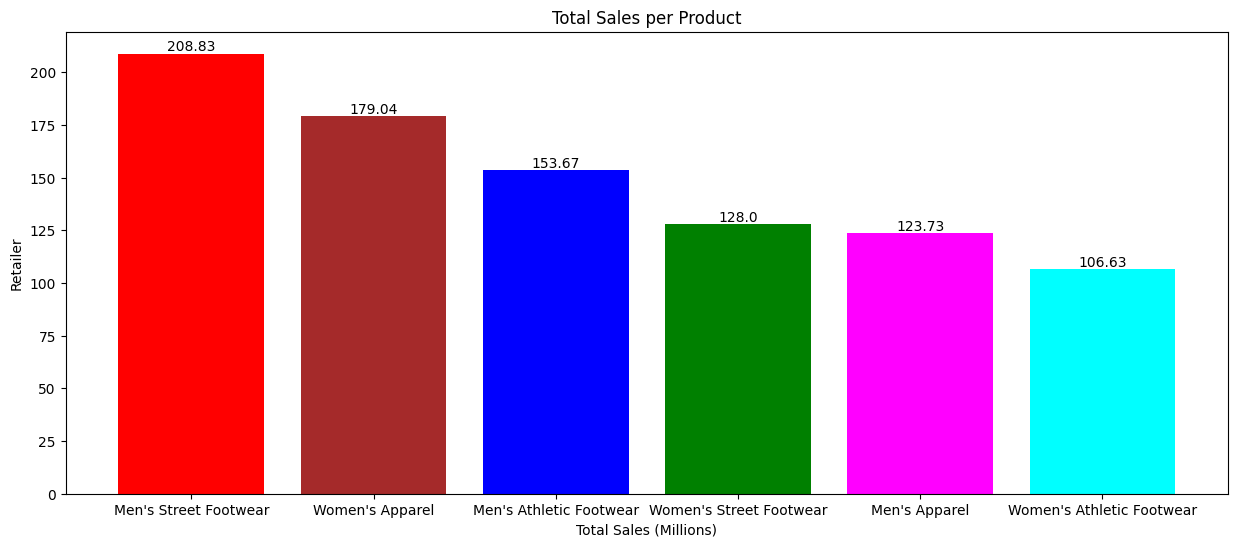

In [32]:
adidas_product_m=(adidasData.groupby("Product")['Total Sales'].sum()/1000000).round(2).sort_values(ascending=False)


color = ['red', 'brown', 'blue', 'green',"magenta","cyan"]

# Create a horizontal bar chart
plt.figure(figsize=(15, 6))
plt.bar(adidas_product_m.index, adidas_product_m.values,color=color)

# Add labels to each bar
for i, value in enumerate(adidas_product_m.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')


# Add titles and labels
plt.title('Total Sales per Product')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Retailer')
plt.show()


**We found top Sales Product in Adidas company for last two years**

### Create Table For Products and Sales of retailers

In [33]:
adidas_product_retailer_k=(adidasData.pivot_table(values='Total Sales',index='Retailer',columns='Product',aggfunc=np.mean)/1000).round(2)
adidas_product_retailer_k

Product,Men's Apparel,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Athletic Footwear,Women's Street Footwear
Retailer,,,,,,
Amazon,66.72,75.55,139.38,98.81,50.22,59.90
Foot Locker,68.15,82.53,128.02,99.99,54.84,66.41
Kohl's,82.84,103.98,130.36,118.11,73.06,86.25
Sports Direct,73.23,91.66,115.44,108.84,68.48,81.36
Walmart,101.69,130.77,147.76,143.14,85.91,105.70
West Gear,84.64,108.10,134.94,119.41,76.09,90.97


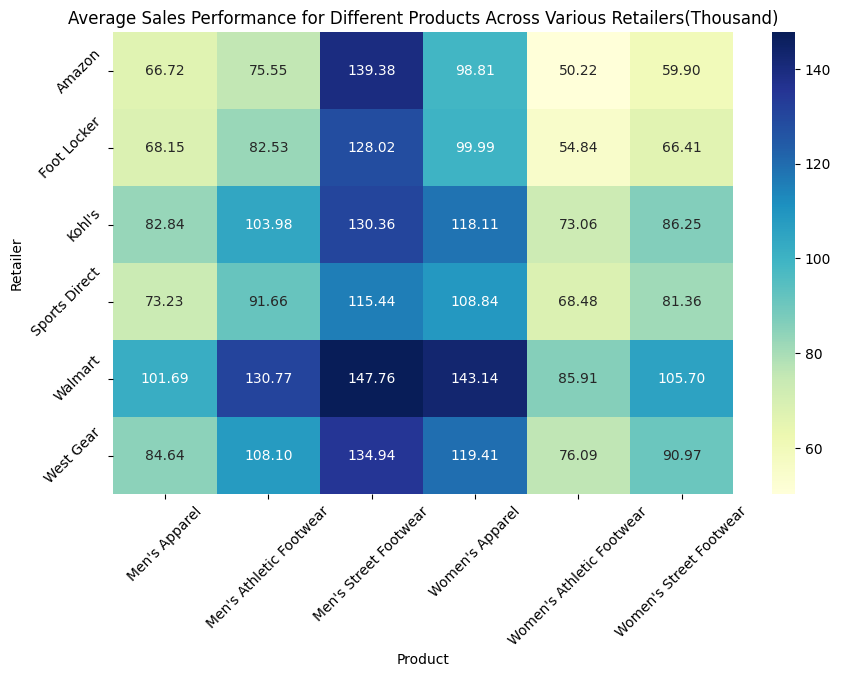

In [34]:
adidas_product_retailer_k=(adidasData.pivot_table(values='Total Sales',index='Retailer',columns='Product',aggfunc=np.mean)/1000).round(2)

# Create heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.heatmap(adidas_product_retailer_k, annot=True, fmt=".2f", cmap="YlGnBu")

# Set plot title and labels
plt.title("Average Sales Performance for Different Products Across Various Retailers(Thousand)")
plt.xlabel("Product")
plt.ylabel("Retailer")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Show the plot
plt.show()

**1. Best selling product =>Men's Street Footwear =>in all retailers**

**2. Walmart the best one**

**3. We can orders product from the best => (Men's Street Footwear,Women's Apparel,Men's Athletic Footwear)**

In [35]:
adidas_product_sale=adidasData.groupby(['Product'],as_index=False)[["Total Sales","Year"]].value_counts()
adidas_product_sale

,Product,Total Sales,Year,count
0,Men's Apparel,75000.0,2021,15
1,Men's Apparel,100000.0,2021,14
2,Men's Apparel,87500.0,2021,11
3,Men's Apparel,60000.0,2021,11
4,Men's Apparel,90000.0,2021,9
...,...,...,...,...
6723,Women's Street Footwear,6324.0,2021,1
6724,Women's Street Footwear,6328.0,2020,1
6725,Women's Street Footwear,6318.0,2021,1
6726,Women's Street Footwear,6300.0,2021,1


In [36]:
top_products= adidasData[['Product','Total Sales']].groupby('Product',as_index=False).sum().sort_values(by="Total Sales",ascending=False)
top_products


3,Product,Total Sales
2,Men's Street Footwear,208826244.0
3,Women's Apparel,179038860.0
1,Men's Athletic Footwear,153673680.0
5,Women's Street Footwear,128002813.0
0,Men's Apparel,123728632.0
4,Women's Athletic Footwear,106631896.0


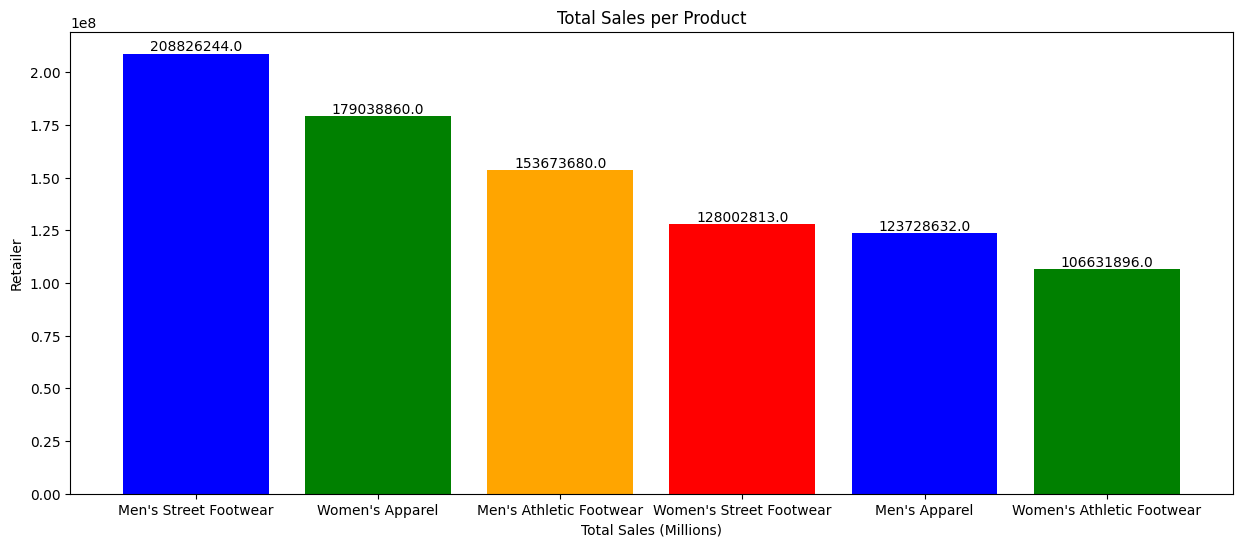

In [37]:


top_products=(adidasData.groupby("Product")['Total Sales'].sum()).round(2).sort_values(ascending=False)

colors = ['blue', 'green', 'orange', 'red']

# Create a horizontal bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_products.index, top_products.values,color=colors)

# Add labels to each bar
for i, value in enumerate(top_products.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')


# Add titles and labels
plt.title('Total Sales per Product')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Retailer')
plt.show()


### ***Men's Street Footwear has the highest sales amount***

average unit price,=> 45.22 => Most of the price range between $40 - $60 and the average product price is $45.22


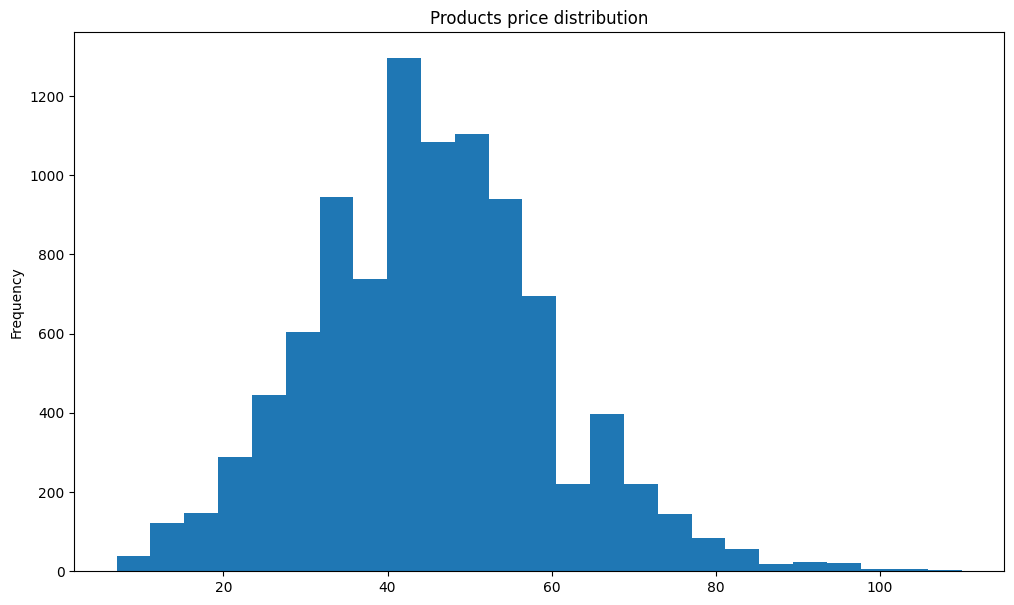

In [38]:
adidasData['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution')
PriceMean=round(adidasData['Price per Unit'].mean(),2)
 
print("average unit price,=>", PriceMean,"=> Most of the price range between $40 - $60 and the average product price is $45.22")

<Axes: xlabel='Sales Method'>

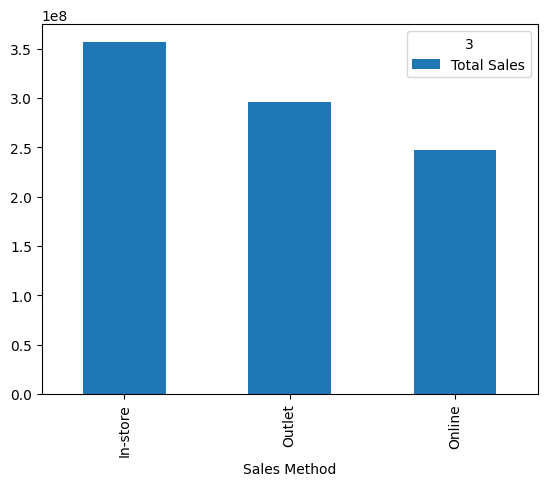

In [39]:
top_salesmt= adidasData[['Sales Method','Total Sales']].groupby('Sales Method').sum().sort_values(by="Total Sales",ascending=False)
top_salesmt.plot(kind='bar')



### ***It's clear that retailers sell more products in-store***

### ***Machine learning Section***

### Correlation between feature

In [40]:
corr=adidasData.corr(numeric_only=True)

print(corr)

3                 Price per Unit  Units Sold  Total Sales  Operating Profit  \
3                                                                             
Price per Unit          1.000000    0.265869     0.435811          0.394546   
Units Sold              0.265869    1.000000     0.913431          0.892379   
Total Sales             0.435811    0.913431     1.000000          0.956307   
Operating Profit        0.394546    0.892379     0.956307          1.000000   
Operating Margin       -0.137486   -0.305479    -0.364592         -0.211920   
Year                   -0.145400   -0.180997    -0.129627         -0.103865   
Quarter                 0.249188   -0.012522     0.044669          0.054718   

3                 Operating Margin      Year   Quarter  
3                                                       
Price per Unit           -0.137486 -0.145400  0.249188  
Units Sold               -0.305479 -0.180997 -0.012522  
Total Sales              -0.364592 -0.129627  0.044669  
Ope

<Axes: xlabel='3', ylabel='3'>

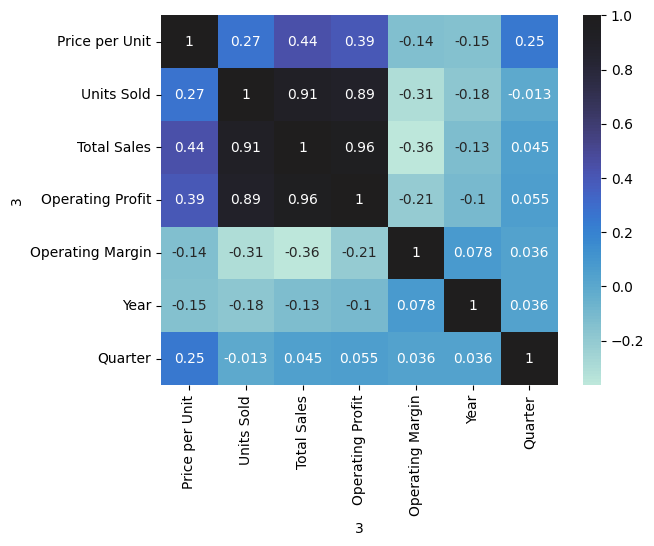

In [41]:
sns.heatmap(corr,center=True,annot=True)

In [42]:
adidasData.head(3)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Dayes,Quarter
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,January,Wednesday,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,January,Thursday,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,January,Friday,1


In [43]:
adidasData['Region']=pd.factorize(adidasData.Region)[0]
adidasData['State']=pd.factorize(adidasData.State)[0]
adidasData['City']=pd.factorize(adidasData.City)[0]
adidasData['Product']=pd.factorize(adidasData.Product)[0]
adidasData['Retailer']=pd.factorize(adidasData.Retailer)[0]
adidasData['Sales Method']=pd.factorize(adidasData["Sales Method"])[0]


In [44]:
adidasData.head(3)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Dayes,Quarter
0,0,1185732,2020-01-01,0,0,0,0,50.0,1200.0,600000.0,300000.0,0.50,0,2020,January,Wednesday,1
1,0,1185732,2020-01-02,0,0,0,1,50.0,1000.0,500000.0,150000.0,0.30,0,2020,January,Thursday,1
2,0,1185732,2020-01-03,0,0,0,2,40.0,1000.0,400000.0,140000.0,0.35,0,2020,January,Friday,1


## ***Drop some feature we are't need***

In [45]:
adidasData.drop(columns=["Retailer ID","Invoice Date","Year","Month","Dayes","Quarter"],axis=1,inplace=True)

In [46]:
adidasData.head(3)

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,0,0,0,0,50.0,1200.0,600000.0,300000.0,0.50,0
1,0,0,0,0,1,50.0,1000.0,500000.0,150000.0,0.30,0
2,0,0,0,0,2,40.0,1000.0,400000.0,140000.0,0.35,0


### Values for testing and trainning

In [47]:
X= adidasData.values[:,(0,1,2,3,4,5,6,8,9,10)]
y= adidasData.values[:, 7]

In [48]:
X.shape

(9648, 10)

In [49]:
print(y)
print(y.shape)

[600000. 500000. 400000. ...   7544.   2940.   2407.]
(9648,)


### ***Splitting***

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### ***Regression***

In [51]:
lr= LinearRegression()

### ***Fitting***

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
round(lr.score(X_train,y_train),2)

0.96

In [54]:
round(lr.score(X_test,y_test),2)

0.96

### ***Predicting***

In [55]:
y_pred = lr.predict(X_test)

### Score

In [56]:
r2=r2_score(y_test, y_pred)
r2

0.9587615824779095

### ***Sales Predict And Adding to the Content*** 

In [57]:
adidasData['sales_pred']= lr.predict(X)

In [58]:
adidasData.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,sales_pred
0,0,0,0,0,0,50.0,1200.0,600000.0,300000.0,0.50,0,702908.821784
1,0,0,0,0,1,50.0,1000.0,500000.0,150000.0,0.30,0,450185.820508
2,0,0,0,0,2,40.0,1000.0,400000.0,140000.0,0.35,0,416059.922963
3,0,0,0,0,3,45.0,850.0,382500.0,133875.0,0.35,0,383273.131808
4,0,0,0,0,4,60.0,900.0,540000.0,162000.0,0.30,0,463924.196413


### ***Final we can visualize the predicted and actual sales***

Text(0.5, 1.0, 'Model correlation')

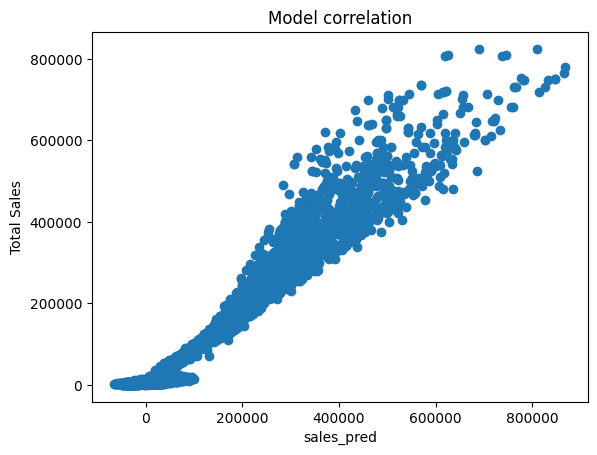

In [59]:
plt.scatter(adidasData['sales_pred'],adidasData['Total Sales'])
plt.xlabel("sales_pred")
plt.ylabel("Total Sales")
plt.title('Model correlation')

# ***Remarkes and comments***

**1. Best retailers and sales:**

Southeast region clearly have the highest sales per retailer,
West region has the highest total sales compareing regions ,

**2.Trends in Sales:**

Best sales are in summer and holidayes,
**3. Top Products => sale:**

Best selling product => (Men's Street Footwear) =>all retailers

Also Walmart have a good seling all of our products in average.

There is tree type of most selled average product in all our retailers and its (Men's Street Footwear,Women's Apparel,Men's Athletic Footwear)
**4. Top Sales Method:**

Its appear that with less quantity of sales in-shop they produce more income then online and outlets.What is very weird for me always thought the online and outlets produce more profit than store selling

**5. Retailer Analysis:**

The Southeast region consists of states like Florida, Georgia, Kentucky, North Carolina, South Carolina, and Virginia, which contribute significantly to sales in that region.
Some retailers have higher total sales than others, but a comprehensive analysis of retailer performance requires further examination.